<center><h1>QBUS6840 - Predictive Analytics </h1></center>

# Tutorial 2 - Working with Time-Series II
 
### Objectives: Get familiar with Time Series data manipulation

 
1. How to generate random numbers and set random seed
2. How to shift a time series
3. How to retrieve data from a DataFrame

In our last tutorial, we have learnt the data preprocessing in Time Series, e.g. loading the dataset from a csv file, indexing the data, and visualizing the data. In this week, we will go one step further with data manipulation.

Let's continue with step 5 in the last tutorial. At the end of the task, you got a plot of the time series showing number of passengers in different time points.

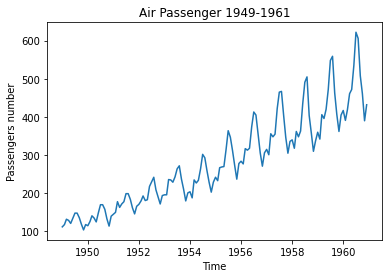

In [19]:
# Import some external libraries
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For visualization
import numpy as np                 # For linear algebra

# Load data and set the Month column as the index column
data_time = pd.read_csv('AirPassengers.csv')              # Read data from a csv file
data_time['Month']=pd.to_datetime(data_time['Month'])     # Convert the data in the Month column to datetime
data_time.set_index('Month', inplace=True)                # Indexing the DataFrame by the Month column
data_time.head()

# Extract the Passengers column and plot the time series
ts = data_time['Passengers'] 
# read passagner per day

# Create a figure and plot the time series
plt.figure()                          # Create an empty figure
plt.plot(ts)   # Implicitly use time indexes for x data



plt.title('Air Passenger 1949-1961')  # Add title to the plot
plt.xlabel('Time')                    # Add label to the x-axis
plt.ylabel('Passengers number')       # Add label to the y-axis
plt.show()

In [25]:
print(len(ts))

144


**Note:** If you don't want to see the warning about the implicit data time converter of Pandas, you can explicitly add the values for x-axis as `plt.plot(ts.index,ts)`, or add this line anywhere before calling the `plot()` function
```Python
pd.plotting.register_matplotlib_converters()
```

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Can you rotate xticks a 70 degree angle? **Hint:** using `plt.xticks()` with `rotation=70`
- Can you change the figure size to *width=15* and *height=6*? **Hint:** using `plt.figure()` with argument `figsize=(15,6)`

## 1. Random numbers and random seed

You may notice that the above plot is neat and clean. However, sometimes, this kind of data may not good for the use of time series forecasting due to the lack of **generalization**. In order to overcome this issue, a common practice is to add some random numbers to the dataset as a form of **regularization**, and therefore, improving the **generalization** of the model.

Here, we will add random numbers, or simulated/synthetic noise, to our original data. By doing this, we will use `numpy` library to generate random numbers and add those numbers to the air passenger dataset.

In general, when you have used random numbers in your program, every time when you run your program, it will give different results, causing trouble to validate the problem. To make sure you can obtain the "same" results for all runs, you can start by "seeding" numpy’s random number generator (RNG). Seeding can guarantee that each time you run the script the same random data will be produced. You can use any number as the parameter to the seed function. In this tutorial, let's chose $0$. 

**Note:** The main purpose of this section is to introduce the concept of random number, random seed and how to use `numpy` to generate random numbers in a sample case where we may need to use random numbers. The section does not imply that we always have to add random numbers to clean time series data to make the data more realistic.    


In [39]:
# Fixing random state for reproducibility
np.random.seed(0)  



Then generate some random data that is the same length as the Air Passengers data:

In [41]:
# Create a vector of random numbers with the same length as the ts series
random_data = np.random.randn(len(ts))
random_data

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462,
       -1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877,
        0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215,
        0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275,
       -1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218,
       -0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028,
       -0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223,
        0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117,
       -0.67246045, -0.35955316, -0.81314628, -1.7262826 ,  0.17742614,
       -0.40178094, -1.63019835,  0.46278226, -0.90729836,  0.05

Then add the following code to plot the data. We use a scale factor to control the impact of the simulated noise to the original data.  

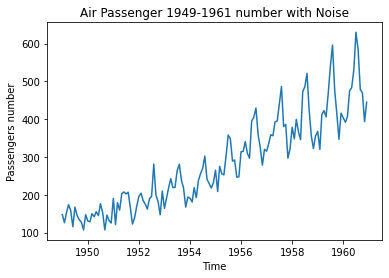

In [55]:
# Add random noise to all data points
# scale 功能可以把上面的noise放大
scale = 20 
ts_noise = ts + (random_data * scale)  

# Plot the noisy data and make the plot more informative
plt.figure()
plt.plot(ts.index,ts_noise)
plt.title('Air Passenger 1949-1961 number with Noise')  # Add title to the plot
plt.xlabel('Time')                                      # Add label to the x-axis
plt.ylabel('Passengers number')                         # Add label to the y-axis
plt.show()

In [56]:
print(len(ts))


144


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the length of `ts_noise`?
- What will happen to `ts_noise` when `scale` is too big or too small?
- If you don't run `np.random.seed(0)` at the very beginning, guess what could happen?

## 2.  Time-shifts

Another common time series-specific operation is shifting of data in time, e.g. lagging or leading. If the time series is stored as a Series object, then we can call the `shift()` method to shift the data. The shifting operation can be specified in multiple frequencies, e.g. different number of lags or leads. 

Continue with the last step, here we will shift the data by 6 months ahead as

In [57]:
data_shift  = ts_noise.shift(6)       # Shift data by 6 months
print(data_shift.head(10))            # Print the first 10 data points
print(data_shift.tail(10))            # Print the last 10 data points

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    147.281047
1949-08-01    126.003144
1949-09-01    151.574760
1949-10-01    173.817864
Name: Passengers, dtype: float64
Month
1960-03-01    476.445895
1960-04-01    415.149237
1960-05-01    346.601679
1960-06-01    415.784984
1960-07-01    403.513347
1960-08-01    391.636611
1960-09-01    406.283078
1960-10-01    474.528666
1960-11-01    483.531816
1960-12-01    530.834025
Name: Passengers, dtype: float64


Then we plot the original noised data and the shifted data within one window by using `plt.subplots()`. Below is an example, 

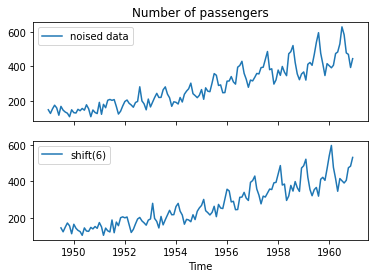

In [58]:
# Plot 2 time series in 2 sub plots
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(ts_noise)
ax[1].plot(data_shift)
ax[0].legend(['noised data'], loc=2)     # Adding legend for the 'noise data' series
ax[1].legend(['shift(6)'], loc=2)        # Adding legend for the 'noise data' series
ax[0].set_title('Number of passengers')  # Use subplot 1's title as the shared title
ax[1].set_xlabel('Time')                 # Use subplot 2's xlabel as the shared label for x-axis  
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the data type of `ax`?
- What is `ax[0]`, `ax[1]` and `ax[2]`?
- Which statement controls the number of rows and columns of the plots?
- What are the difference among three new data series?
- Can you modify the `loc` argument and see what happen?

From the above example, we can see `shift(6)` function could shift the data index with 6 points, which is 6 months in our case. This function pushes some of data point off the end of the graph (and leaving NA values at the other end).
   

## 3.  Retrieving data from a DataFrame

`DataFrame` is a special data type of Pandas, designed to store tabular data, e.g. data with rows and columns. Let's take a closer look at what we can do with Pandas `DataFrame`.

Download the **'drinks.csv'** file from the QBUS6840 Canvas site, and use Excel to pre-view the data file so that you understand what information is in the file.

Add the following to your script to import the drinks file:


In [61]:
drinks = pd.read_csv('drinks.csv')   # Read data from a csv file
drinks.head()                        # Print the first 5 rows of the DataFrame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


To view the information about each column, we use the `info()` method of the DataFrame class

In [63]:
# Print general information about the data
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Was the information same as what you have observed in Excel?
- What is the data type of the beer servings column?
- How many rows do you have? Is the same number of rows in Excel?

We can easily get some basic statistics about each column by using the `describe()` method of the DataFrame class

In [64]:
# Get summary statistics of numerical columns
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- What is the mean of the wine servings column?



To extract a single column, you can index a column by its column name. For example, let's extract the beer servings column and print general description about the beer serving amount:

In [65]:
beer_series = drinks['beer_servings']     # Extract the beer_servings column as a Series
                                          # or you can write  beer_series = drinks.beer_servings
print(beer_series.describe())  # Summarize only the beer_servings Series

# Or we can combine 2 steps in a single line of code (nesting)
print(drinks['beer_servings'].describe()) # Summarize only the beer_servings Series

# It is even possible to do like this
print(drinks.beer_servings.describe())

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64
count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64
count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer_servings, dtype: float64


**Note:** `drinks['beer_servings']` or `drinks.beer_servings` give you the same result, which is a Series object.

**Note:** A single column of a pandas `DataFrame` is a `Series` object. `Series` has many of the same features of an entire `DataFrame`. 

Let's calculate the mean of the beer servings by using the `mean()` method of `Series` objects:

In [66]:
# Get the mean of beer_servings column
beer_series.mean()   

106.16062176165804

Pandas allows us to do quite powerful expressions for querying our dataset. For example, you may want to get the countries from Europe. For this dataset try the following:

In [67]:
# Extract only rows with 'continent' equals to 'EU'
euro_frame = drinks[drinks['continent'] == 'EU']   
euro_frame.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


You can even combine queries. Let's get all countries from Europe with yearly wine servings greater than 300:

In [68]:
# Extract only rows with 'continent' equals to 'EU' and 'wine_servings' is more than 300
# Use '&' to connect multiple conditional statements
euro_wine_300_frame = drinks[(drinks['continent'] == 'EU') & (drinks['wine_servings'] > 300)]
euro_wine_300_frame

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Which country drinks most alcohol?

Sometimes your dataset may be missing values. In this case `Pandas` has interpreted countries from North America `(continent = NA)` as having `NaN` values. Let's fix that:

In [75]:
# Fill empty values will 'NA' string
# Modify the original data with 'inplace=True'
drinks['continent'].fillna(value='NA', inplace=True)

You can insert your own columns into a `DataFrame`. For example, let's create some columns based off the existing columns:

In [76]:
# Create a new column by adding 'beer_servings', 'spirit_servings' and 'wine_servings' columns
drinks['total_servings'] = drinks.beer_servings + drinks.spirit_servings + drinks.wine_servings

# Create a new column by multiplyig the 'total_litres_of_pure_alcohol' column by 1000
drinks['alcohol_mL'] = drinks.total_litres_of_pure_alcohol * 1000

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


Finally let's see if there's a relationship between beer servings and total litres of pure alcohol.

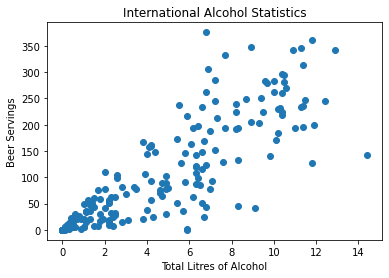

In [74]:
# Scatter plot to visualize the relationship between 'total_litres_of_pure_alcohol' and 'beer_servings'
plt.scatter(drinks['total_litres_of_pure_alcohol'], drinks['beer_servings']) 

# Make the plot more informative
plt.xlabel('Total Litres of Alcohol')                                        
plt.ylabel('Beer Servings')
plt.title('International Alcohol Statistics')
plt.show()

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="question-mark-button.png"> <h3 style="padding-top: 0px;">Question </h3></div>

- Summarize what you have seen from the plot?

<div style="margin-bottom: 0px;"><img width=20 style="display: block; float: left;  margin-right: 20px;" src="docs.png"> <h3 style="padding-top: 0px;">Documentation - DataFrame </h3></div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

# Task

This hourly data set contains the PM2.5 data ***BeijingPM20100101_20151231.csv*** in Beijing. The time period is between Jan 1st, 2010 to Dec 31st, 2015. Missing data are denoted as `NA`.

Now you are required to write a python script to:
1. Read the dataset and store the data in a Dataframe. Use time information as the index of this Dataframe. Note that the time information could be found in the second column (year-month-day-hour) of the csv file.
2. Extract the PM_US_Post column and then store the data according to the year information (say, store each year’s data into a single Series variable).
3. Extract the data in March of each year.
4. Calculate the mean value of each March's data, and then plot these mean value by using a line curve.